In [301]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [302]:
#### INFLATION 

In [303]:
# Set files
cpi_csv = Path("..\\project-1-draft\\Resources\\Inflation\\CPI Australia.csv")
inflation_csv = Path("..\\project-1-draft\\Resources\\Inflation\\Inflation Tradable & Non-tradable, annual movement.csv")

In [304]:
# Read CSV files into DataFrames
cpi_df = pd.read_csv(cpi_csv)
inflation_df = pd.read_csv(inflation_csv)

In [305]:
# Display first few rows
cpi_df.head()
inflation_df.head()

,Date,Tradables,Non-tradables,Median
0,2018,0.6,2.4,1.50
1,2019,1.7,2.0,1.85
2,2020,-0.6,1.5,0.45
3,2021,4.9,2.8,3.85
4,2022,8.7,7.4,8.05


In [306]:
# Create dictionaries
cpi_data = {'Date_cpi': ['2018', '2019', '2020', '2021', '2022', '2023'], 'Value_cpi': [1.8, 1.8, 0.9, 3.5, 7.8, 4.1]}
inflation_data = {'Date_inflation': ['2018', '2019', '2020', '2021', '2022', '2023'], 'Value_inflation': [1.5, 1.85, 0.45, 3.85, 8.05, 3.45]}

# Convert dictionaries to DataFrames
cpi_df = pd.DataFrame(cpi_data)
inflation_df = pd.DataFrame(inflation_data)

In [307]:
# Merge DataFrames on date columns
data_df = pd.merge(cpi_df, inflation_df, left_on='Date_cpi', right_on='Date_inflation')

data_df


,Date_cpi,Value_cpi,Date_inflation,Value_inflation
0,2018,1.8,2018,1.50
1,2019,1.8,2019,1.85
2,2020,0.9,2020,0.45
3,2021,3.5,2021,3.85
4,2022,7.8,2022,8.05
5,2023,4.1,2023,3.45


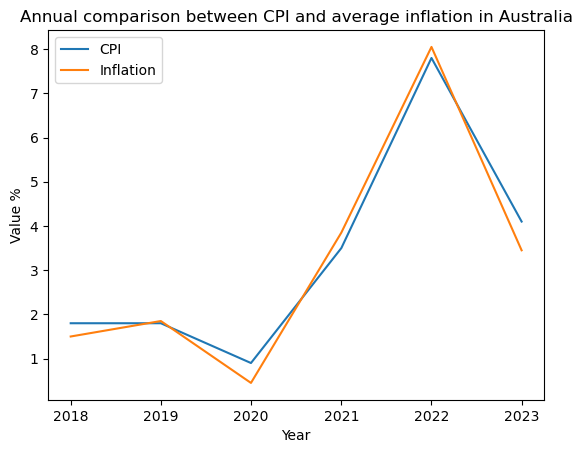

In [308]:
# Convert 'Date_cpi' column to datetime
data_df['Date_cpi'] = pd.to_datetime(data_df['Date_cpi'])

# Sort DataFrame by 'Date_cpi' column
data_df = data_df.sort_values('Date_cpi')

# Plot
plt.plot(data_df['Date_cpi'], data_df['Value_cpi'], label='CPI')
plt.plot(data_df['Date_cpi'], data_df['Value_inflation'], label='Inflation')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between CPI and average inflation in Australia')
plt.legend()
plt.show()

In [309]:
plt.close()

In [310]:
#### FUEL DATA

In [311]:
## FUEL BULK PRICING - BRENT, EXCHANGE RATE

In [312]:
fuel_csv = Path("Resources/Fuel pricing/Dist Fuel Pricing 2019-2023.csv")
fuel_data = pd.read_csv(fuel_csv,skiprows=[])
fuel_data['DATE'] = pd.to_datetime(fuel_data['DATE'], format='%d/%m/%Y')
fuel_data= fuel_data.sort_values('DATE')
fuel_data

,DATE,Brent,Up/Down,Exchange Rate,Up/Down.1,CHANGE,VIVA TGP,BP,CALTEX,MOBIL,RSG,Change,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2018-01-01,60.42,0.00,78,0,0,122.23,123.01,128.63,106.56,109.20,0.27,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,60.42,0.00,78.42,0.42,0.42,122.23,123.01,129.17,106.56,109.20,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,60.37,0.05,78.42,0,0.05,122.72,123.85,129.5,107.33,109.64,0.44,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,61.63,1.26,78.61,0.19,1.07,123.49,124.1,129.5,107.56,110.34,0.7,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,62.01,0.38,78.41,0.2,0.58,123.61,123.97,129.75,107.56,110.45,0.11,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,80.87,1.80,68.24,0.26,1.54,175.02,173.96,179.56,153.07,154.19,0.02,NaN,NaN,NaN,NaN,NaN
2187,2023-12-28,79.63,-1.24,68.44,0.2,-1.44,175.09,174.17,179.54,153.73,154.25,0.06,NaN,NaN,NaN,NaN,NaN
2188,2023-12-29,78.39,-1.24,68.35,-0.09,-1.15,174.78,173.39,178.75,153.54,153.97,-0.28,NaN,NaN,NaN,NaN,NaN
2189,2023-12-30,77.04,-1.35,68.14,-0.21,-1.14,174.20,171.43,177.8,152.82,153.44,-0.53,NaN,NaN,NaN,NaN,NaN


In [313]:
#clean data 
fuel_dropcol=fuel_data.drop(columns=['CHANGE','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Unnamed: 15','Unnamed: 16'])
fuel_dropnan=fuel_dropcol.dropna()
fuel_dropnan

,DATE,Brent,Up/Down,Exchange Rate,Up/Down.1,VIVA TGP,BP,CALTEX,MOBIL,RSG,Change
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17
...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28


In [314]:
#renaming COLUMN HEADERS 
fuel_df=fuel_dropnan.rename(columns={"DATE": "Date","Up/Down": "Brent Movement",
                                         "Up/Down.1": "Exchange rate movement","Change": "RSGG Change",
                                         })

fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change,Year
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27,2018
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44,2018
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7,2018
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11,2018
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33,2023
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02,2023
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06,2023
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28,2023


In [315]:
#finding the movement for three of the fuel companies
viva_move=fuel_df['Viva Movement'] = fuel_df['VIVA TGP'].diff()
mobil_move=fuel_df['Mobil Movement'] = fuel_df['MOBIL'].diff()

#change caltex to numeric 
fuel_df['CALTEX'] = pd.to_numeric(fuel_df['CALTEX'])
Caltex_move=fuel_df['Caltex Movement'] = fuel_df['CALTEX'].diff()
fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change,Year,Viva Movement,Mobil Movement,Caltex Movement
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27,2018,NaN,NaN,NaN
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.50,107.33,109.64,0.44,2018,0.49,0.77,0.87
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.50,107.56,110.34,0.7,2018,0.77,0.23,0.00
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11,2018,0.12,0.00,0.25
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17,2018,-0.19,0.22,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33,2023,0.37,0.00,0.00
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02,2023,0.02,0.00,0.00
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06,2023,0.07,0.66,-0.02
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28,2023,-0.31,-0.19,-0.79


In [316]:
years = [2018,2019,2020,2021, 2022, 2023]  # List of years
averages = []
for year in years:
    condition = fuel_df['Year'] == year
    average = fuel_df.loc[condition, 'Viva Movement'].mean()
    perc_viva=average*100
    averages.append({'Year': year, 'Viva Movement': perc_viva})

Viva_averages = pd.DataFrame(averages)
Viva_averages

,Year,Viva Movement
0,2018,-1.306604
1,2019,7.364706
2,2020,-55.747126
3,2021,128.463415
4,2022,19.350598
5,2023,-6.453846


In [317]:
years = [2018,2019,2020,2021, 2022, 2023]  # List of years
averages1 = []
for year in years:
    condition1 = fuel_df['Year'] == year
    average1 = fuel_df.loc[condition1, 'Mobil Movement'].mean()
    perc_Mobil=average1*100
    averages1.append({'Year': year, 'Mobil Movement': perc_Mobil})

Mobil_averages = pd.DataFrame(averages1)
Mobil_averages

,Year,Mobil Movement
0,2018,-0.641509
1,2019,6.372549
2,2020,-50.988506
3,2021,114.536585
4,2022,17.948207
5,2023,-6.261538


In [318]:
# List of years
years = [2018,2019,2020,2021, 2022, 2023]  
averages2 = []
for year in years:
    condition2 = fuel_df['Year'] == year
    average2 = fuel_df.loc[condition2, 'Caltex Movement'].mean()
    perc_caltex=average2*100
    averages2.append({'Year': year, 'Caltex Movement': perc_caltex})

caltex_averages = pd.DataFrame(averages2)
caltex_averages

,Year,Caltex Movement
0,2018,-1.599057
1,2019,7.588235
2,2020,-56.195402
3,2021,129.073171
4,2022,19.613546
5,2023,-7.711538


In [319]:
#merge all three companies into a dataframe 
fuel_mobil_caltex = pd.merge(Mobil_averages, caltex_averages, left_index=True, right_index=True)
fuel_mobil_caltex_viva = pd.merge(fuel_mobil_caltex, Viva_averages, left_index=True, right_index=True)
#new order 
new_order = ['Year', 'Viva Movement', 'Mobil Movement','Caltex Movement']
fuel_mobil_caltex_viva =fuel_mobil_caltex_viva[new_order]
fuel_mobil_caltex_viva

,Year,Viva Movement,Mobil Movement,Caltex Movement
0,2018,-1.306604,-0.641509,-1.599057
1,2019,7.364706,6.372549,7.588235
2,2020,-55.747126,-50.988506,-56.195402
3,2021,128.463415,114.536585,129.073171
4,2022,19.350598,17.948207,19.613546
5,2023,-6.453846,-6.261538,-7.711538


In [320]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Exchange rate movement'] = pd.to_numeric(fuel_df['Exchange rate movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data = fuel_df.groupby('Year')

# Calculate the average exchange rate for each year
average_exchange_rate = grouped_data['Exchange rate movement'].mean()
perc=average_exchange_rate*100

# Convert the grouped data to a DataFrame
df_average_exchange_rate = perc.reset_index()

# Print the DataFrame
df_average_exchange_rate

,Year,Exchange rate movement
0,2018,62.516432
1,2019,12.909804
2,2020,-6.000000
3,2021,-3.780488
4,2022,-1.147410
5,2023,-1.544402


In [321]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Brent Movement'] = pd.to_numeric(fuel_df['Brent Movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data_brent = fuel_df.groupby('Year')

# Calculate the average exchange rate for each year
average_brent = grouped_data_brent['Brent Movement'].mean()
perc=average_brent*100

# Convert the grouped data to a DataFrame
df_average_brent = perc.reset_index()

# Print the DataFrame
df_average_brent

,Year,Brent Movement
0,2018,90.737089
1,2019,42.215686
2,2020,-52.390805
3,2021,-6.390244
4,2022,12.832669
5,2023,-0.973077


In [322]:
merged_exchange_brent = pd.merge(df_average_brent, df_average_exchange_rate, left_index=True, right_index=True)
merged_exchange_brent=merged_exchange_brent.drop(columns=['Year_y'])
merged_exchange_brent 

,Year_x,Brent Movement,Exchange rate movement
0,2018,90.737089,62.516432
1,2019,42.215686,12.909804
2,2020,-52.390805,-6.000000
3,2021,-6.390244,-3.780488
4,2022,12.832669,-1.147410
5,2023,-0.973077,-1.544402


In [323]:
fuel_df1 = pd.merge(fuel_mobil_caltex_viva,merged_exchange_brent , left_index=True, right_index=True)
fuel_df1=fuel_df1.drop(columns=['Year_x'])
fuel_df1

,Year,Viva Movement,Mobil Movement,Caltex Movement,Brent Movement,Exchange rate movement
0,2018,-1.306604,-0.641509,-1.599057,90.737089,62.516432
1,2019,7.364706,6.372549,7.588235,42.215686,12.909804
2,2020,-55.747126,-50.988506,-56.195402,-52.390805,-6.000000
3,2021,128.463415,114.536585,129.073171,-6.390244,-3.780488
4,2022,19.350598,17.948207,19.613546,12.832669,-1.147410
5,2023,-6.453846,-6.261538,-7.711538,-0.973077,-1.544402


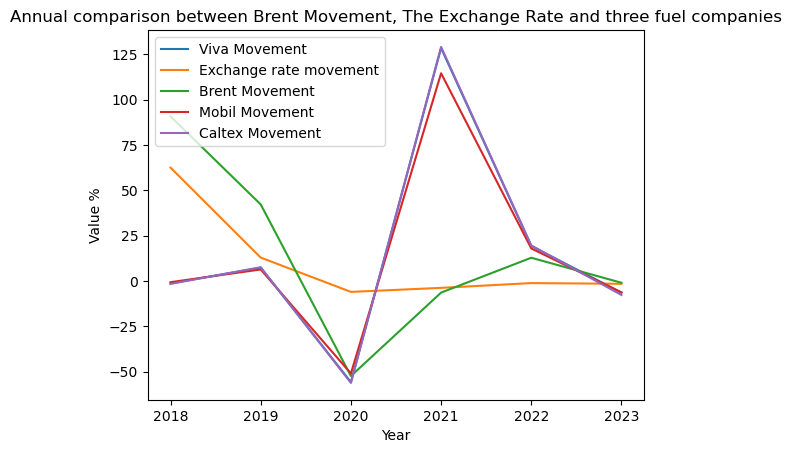

In [324]:


# Plot the line graph
ax = fuel_df1.plot(x='Year', y=['Viva Movement', 'Exchange rate movement', 'Brent Movement','Mobil Movement','Caltex Movement'], kind='line')

ax.set_xticks(fuel_df1['Year'])
ax.set_xticklabels(fuel_df1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Brent Movement, The Exchange Rate and three fuel companies')

# Show the plot
plt.show()

In [325]:
plt.close()

In [326]:
#INFLATION VS EXCHANGE RATE 

In [327]:
inflation__fuel= pd.merge(fuel_df1,inflation_df, left_index=True, right_index=True)
inflation__fuel=inflation__fuel.drop(columns=['Date_inflation'])
inflation__fuel

,Year,Viva Movement,Mobil Movement,Caltex Movement,Brent Movement,Exchange rate movement,Value_inflation
0,2018,-1.306604,-0.641509,-1.599057,90.737089,62.516432,1.50
1,2019,7.364706,6.372549,7.588235,42.215686,12.909804,1.85
2,2020,-55.747126,-50.988506,-56.195402,-52.390805,-6.000000,0.45
3,2021,128.463415,114.536585,129.073171,-6.390244,-3.780488,3.85
4,2022,19.350598,17.948207,19.613546,12.832669,-1.147410,8.05
5,2023,-6.453846,-6.261538,-7.711538,-0.973077,-1.544402,3.45


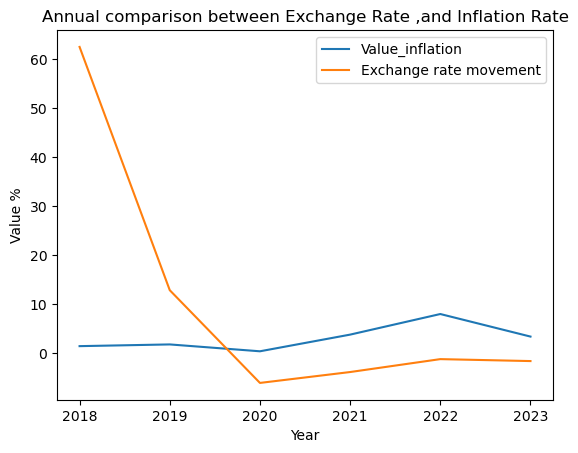

In [328]:
##cost of fuel movement vs inflation
#changing date to match 
# Plot the line graph
ax = inflation__fuel.plot(x='Year', y=['Value_inflation', 'Exchange rate movement'], kind='line')

ax.set_xticks(inflation__fuel['Year'])
ax.set_xticklabels(inflation__fuel['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Exchange Rate ,and Inflation Rate')

# Show the plot
plt.show()

In [329]:
plt.close()

In [330]:
### FUEL PRICING - RETAIL 

In [331]:
#pull data for nation dist price

rows_to_skip = [0,2,3, 4, 5, 6,7,8,9,10,11]

fuel_csv1 = Path("Resources/Fuel pricing/Average DIST price.csv")
fuel_csv1 = Path("Resources/Fuel pricing/Average DIST price.csv")
fuel_pricingdata = pd.read_csv(fuel_csv1, usecols=['Year', 'National'], skiprows=lambda x: x in rows_to_skip)

# Rename the column
fuel_pricingdata = fuel_pricingdata.rename(columns={"National": "National Diesel Pump Price"})
#drop NAN                                         
fuel_pricingdata = fuel_pricingdata.dropna()
fuel_pricingdata

,Year,National Diesel Pump Price
0,2017,129.6
1,2018,149.8
2,2019,148.0
3,2020,126.9
4,2021,143.0
5,2022,207.5
6,2023,200.1


In [332]:
                                                
# Convert 'Year' column to numeric data type
fuel_pricingdata['Year'] = pd.to_numeric(fuel_pricingdata['Year'], errors='coerce')
fuel_pricingdata

,Year,National Diesel Pump Price
0,2017,129.6
1,2018,149.8
2,2019,148.0
3,2020,126.9
4,2021,143.0
5,2022,207.5
6,2023,200.1


In [333]:
#createing loop
results = []

# Create a loop to calculate the difference between the national diesel pump price of the current year and the previous year
for i in range(1, len(fuel_pricingdata)):
    current_year = fuel_pricingdata['Year'].iloc[i]
    previous_year = fuel_pricingdata['Year'].iloc[i-1]
    current_year_price = fuel_pricingdata['National Diesel Pump Price'].iloc[i]
    previous_year_price = fuel_pricingdata['National Diesel Pump Price'].iloc[i-1]
    difference = current_year_price - previous_year_price
    
    # Append the result to the list
    results.append({'Year': current_year, 'Dist Difference': difference})

# Convert the list into a DataFrame
df_dist = pd.DataFrame(results)

# Print the DataFrame
print(df_dist)

   Year  Dist Difference
0  2018             20.2
1  2019             -1.8
2  2020            -21.1
3  2021             16.1
4  2022             64.5
5  2023             -7.4


In [334]:
#pull data for national petrol price 
fuel_csv3 = Path("Resources/spendings/Consumer Price Index and selected components.csv")
fuel_csv3
fuel_petroldata = pd.read_csv(fuel_csv3,usecols=['X.1','PETROL'],skiprows=[])
fuel_petroldata =fuel_petroldata.rename(columns={"X.1": "Month/year"
                                         })
fuel_petroldata=fuel_petroldata.dropna()
fuel_petroldata

,Month/year,PETROL
0,Dec-11,98.8
1,Mar-12,101.2
2,Jun-12,101.9
3,Sep-12,97.9
4,Dec-12,100.4
5,Mar-13,101.6
6,Jun-13,98.5
7,Sep-13,106.0
8,Dec-13,104.8
9,Mar-14,109.1


In [335]:
# Convert 'PETROL' column to numeric data type
fuel_petroldata['PETROL'] = pd.to_numeric(fuel_petroldata['PETROL'], errors='coerce')

# Extract the year from 'Month/year' column
fuel_petroldata['Year'] = pd.to_datetime(fuel_petroldata['Month/year'], format='%b-%y').dt.year

# Group by 'Year' and calculate the average petrol prices per year
average_petrol_prices = fuel_petroldata.groupby('Year')['PETROL'].mean()

In [336]:
#group by year 
# Convert the 'petrol' column to numeric
fuel_petroldata['PETROL'] = pd.to_numeric(fuel_petroldata['PETROL'], errors='coerce')
fuel_petroldata['Year'] = pd.to_datetime(fuel_petroldata['Month/year'], format='%b-%y').dt.year
average_petrol_prices = fuel_petroldata.groupby('Year')['PETROL'].mean()

average_petrol_prices

Year
2011     98.800000
2012    100.350000
2013    102.725000
2014    103.750000
2015     90.200000
2016     82.900000
2017     91.500000
2018    102.725000
2019    101.475000
2020     89.225000
2021    106.400000
2022    131.875000
2023    133.933333
Name: PETROL, dtype: float64

In [337]:
#create a loop that takes the current year - previous year to get the average difference between the price then * 100 to get percentage and thats the inflation rate 

results = []
for i in range(1, len(average_petrol_prices)):
    current_year = average_petrol_prices.index[i]
    previous_year = average_petrol_prices.index[i-1]
    current_year_average = average_petrol_prices.iloc[i]
    previous_year_average = average_petrol_prices.iloc[i-1]
    difference = current_year_average - previous_year_average
    results.append({'Year': current_year, 'Petrol Difference': difference})

df_petrol = pd.DataFrame(results)
df_petrol['Year'] = df_petrol['Year'].astype(int)
print(df_petrol)

    Year  Petrol Difference
0   2012           1.550000
1   2013           2.375000
2   2014           1.025000
3   2015         -13.550000
4   2016          -7.300000
5   2017           8.600000
6   2018          11.225000
7   2019          -1.250000
8   2020         -12.250000
9   2021          17.175000
10  2022          25.475000
11  2023           2.058333


In [338]:
pricing_df = pd.merge(df_dist, df_petrol, on='Year')
pricing_df

,Year,Dist Difference,Petrol Difference
0,2018,20.2,11.225000
1,2019,-1.8,-1.250000
2,2020,-21.1,-12.250000
3,2021,16.1,17.175000
4,2022,64.5,25.475000
5,2023,-7.4,2.058333


In [339]:
inflation__fuelprice= pd.merge(pricing_df,inflation_df, left_index=True, right_index=True)
inflation__fuelprice

,Year,Dist Difference,Petrol Difference,Date_inflation,Value_inflation
0,2018,20.2,11.225000,2018,1.50
1,2019,-1.8,-1.250000,2019,1.85
2,2020,-21.1,-12.250000,2020,0.45
3,2021,16.1,17.175000,2021,3.85
4,2022,64.5,25.475000,2022,8.05
5,2023,-7.4,2.058333,2023,3.45


In [340]:
inflation__fuelprice=inflation__fuelprice.drop(columns=['Date_inflation'])
inflation__fuelprice

,Year,Dist Difference,Petrol Difference,Value_inflation
0,2018,20.2,11.225000,1.50
1,2019,-1.8,-1.250000,1.85
2,2020,-21.1,-12.250000,0.45
3,2021,16.1,17.175000,3.85
4,2022,64.5,25.475000,8.05
5,2023,-7.4,2.058333,3.45


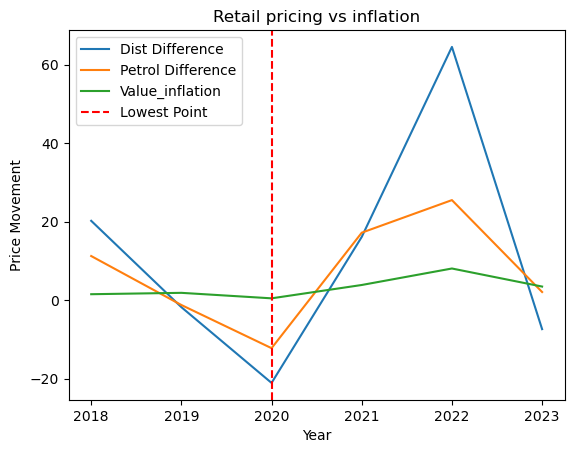

In [341]:
# Plot the line graph
ax = filtered_data1.plot(x='Year', y=['Dist Difference', 'Petrol Difference', 'Value_inflation'], kind='line')
ax.set_xticks(filtered_data1['Year'])
ax.set_xticklabels(filtered_data1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Retail pricing vs inflation')

# Find the x-axis value for the vertical line
vertical_line_x = 2020

# Add a vertical line at the specified x-axis value
ax.axvline(x=vertical_line_x, color='red', linestyle='--', label='Lowest Point')

# Show the plot
plt.legend()
plt.show()

In [342]:
plt.close()

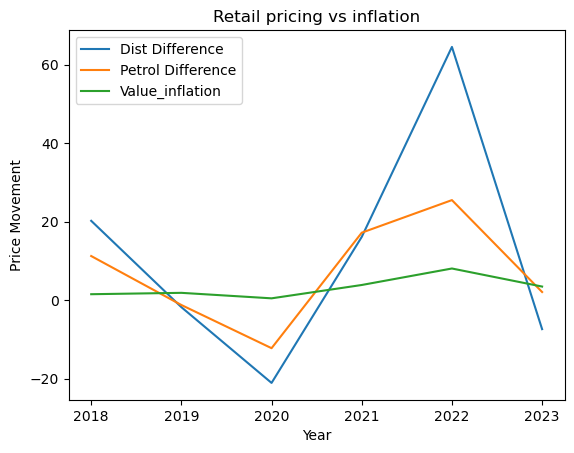

In [343]:
# Plot the line graph
selected_years = [2018, 2019, 2020,2021,2022,2023]

# Filter the data based on the selected years
filtered_data1 = inflation__fuelprice[inflation__fuelprice['Year'].isin(selected_years)]

# Plot the line graph
ax = filtered_data1.plot(x='Year', y=['Dist Difference', 'Petrol Difference', 'Value_inflation'], kind='line')
ax.set_xticks(filtered_data1['Year'])
ax.set_xticklabels(filtered_data1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Retail pricing vs inflation')

# Show the plot
plt.show()

In [344]:
plt.close()

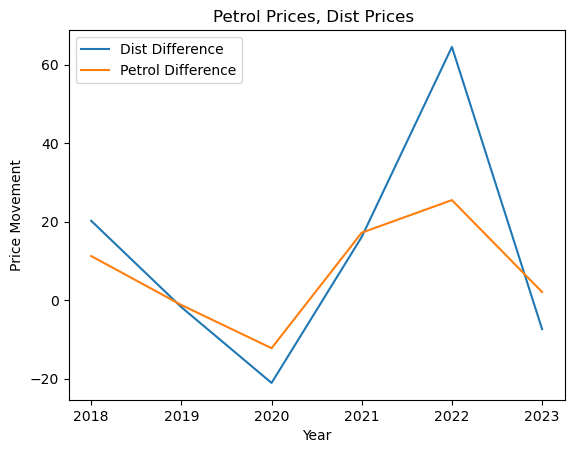

In [345]:
# Plot the line graph
# Filter the DataFrame to include only certain years
desired_years = [2018, 2019, 2020,2021,2022,2023]  # Replace with the years you want to include
filtered_df = pricing_df[pricing_df['Year'].isin(desired_years)]

# Plot the line graph
ax = filtered_df.plot(x='Year', y=['Dist Difference', 'Petrol Difference'], kind='line')

# Set the x-axis ticks and labels
ax.set_xticks(filtered_df['Year'])
ax.set_xticklabels(filtered_df['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Petrol Prices, Dist Prices ')

# Show the plot
plt.show()

In [346]:
plt.close()

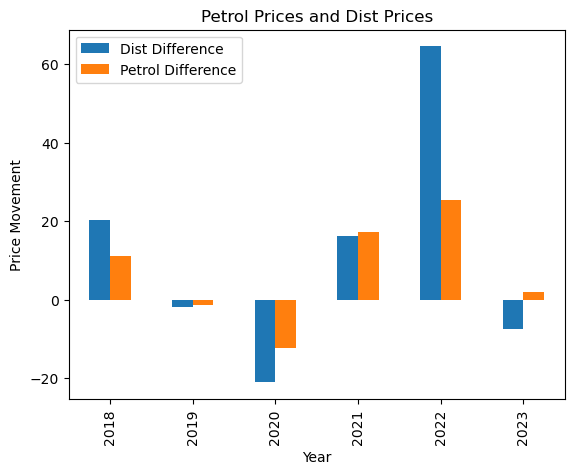

In [351]:
# Plot the bar graph
desired_years = [2018, 2019, 2020,2021,2022,2023] 
filtered_df = pricing_df[pricing_df['Year'].isin(desired_years)]

ax = filtered_df.plot(x='Year', y=['Dist Difference', 'Petrol Difference'], kind='bar')

# Set the x-axis ticks and labels
ax.set_xticks(range(len(filtered_df['Year'])))
ax.set_xticklabels(filtered_df['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Petrol Prices and Dist Prices')

# Show the plot
plt.show()

In [352]:
plt.close()

In [353]:
#### WAGE

In [354]:
wpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\WPI-.csv")
cpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\CPI.csv")


In [355]:
wpi_df = pd.read_csv(wpi_csv)
cpi_df = pd.read_csv(cpi_csv)

In [356]:
cpi_df.head()

,Date,Change from previous quarter (%),Annual change (%),"All groups CPI, Australia, quarterly and annual movement (%)"
0,Mar-18,0.4,1.9,NaN
1,Jun-18,0.4,2.1,NaN
2,Sep-18,0.4,1.9,NaN
3,Dec-18,0.5,1.8,NaN
4,Mar-19,0.0,1.3,NaN


In [357]:
wpi_df.head()

,Date,Quarterly (%),Annual (%),"All sector WPI, quarterly and annual movement (%), seasonally adjusted (a)"
0,Mar-18,0.5,2.0,NaN
1,Jun-18,0.6,2.1,NaN
2,Sep-18,0.6,2.3,NaN
3,Dec-18,0.5,2.3,NaN
4,Mar-19,0.5,2.3,NaN


In [358]:
cpi_data = {
    'Date_cpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_cpi': [1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4]
}

wpi_data = {
    'Date_wpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_wpi': [2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4]
}

cpi_df = pd.DataFrame(cpi_data)
wpi_df = pd.DataFrame(wpi_data)

In [359]:
data_df = pd.merge(cpi_df, wpi_df, left_on='Date_cpi', right_on='Date_wpi')

data_df

,Date_cpi,Value_cpi,Date_wpi,Value_wpi
0,Mar-18,1.9,Mar-18,2.0
1,Jun-18,2.1,Jun-18,2.1
2,Sep-18,1.9,Sep-18,2.3
3,Dec-18,1.8,Dec-18,2.3
4,Mar-19,1.3,Mar-19,2.3
5,Jun-19,1.6,Jun-19,2.3
6,Sep-19,1.7,Sep-19,2.2
7,Dec-19,1.8,Dec-19,2.2
8,Mar-20,2.2,Mar-20,2.2
9,Jun-20,-0.3,Jun-20,1.8


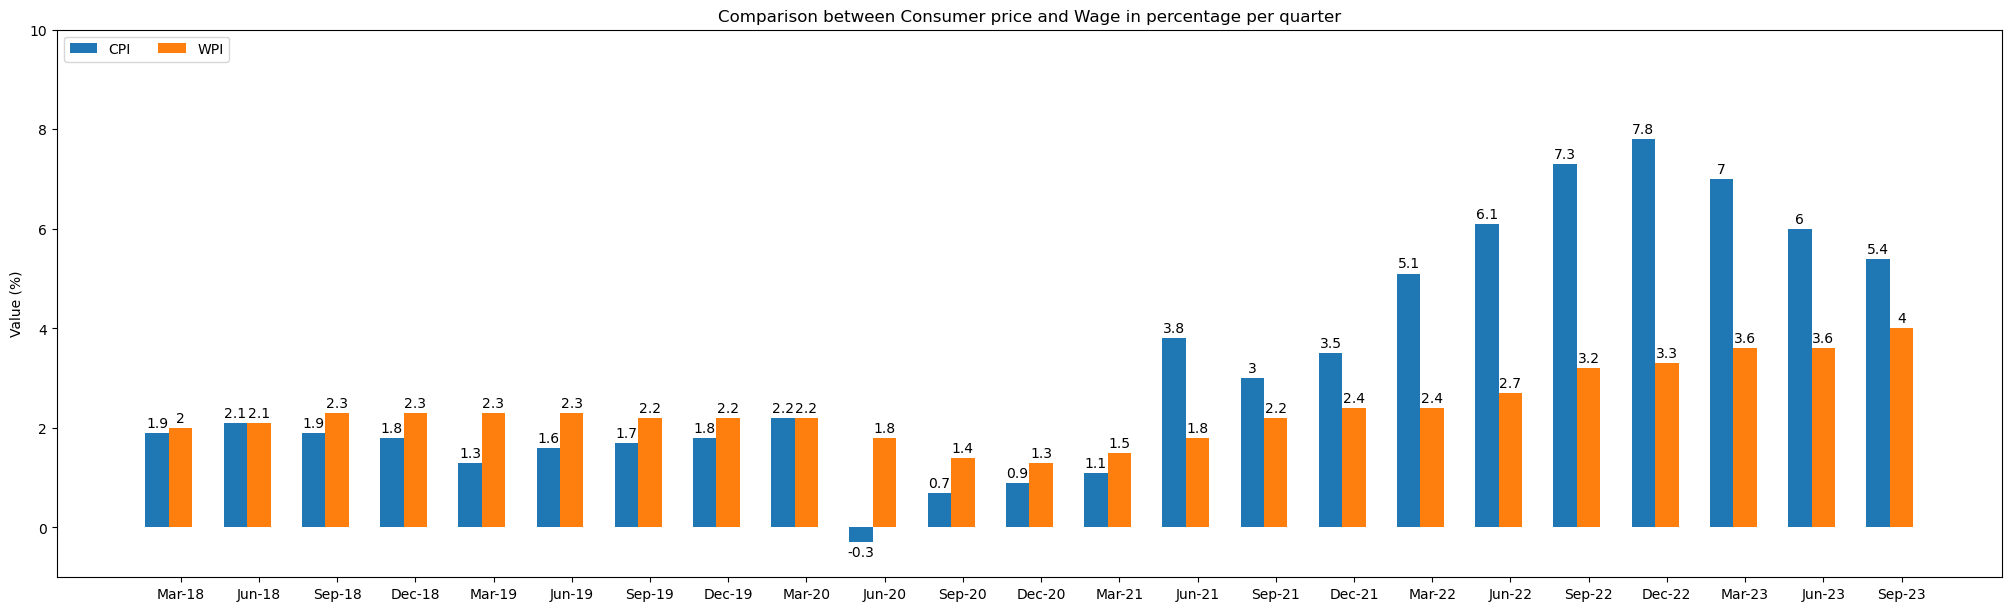

In [360]:
date = ('Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23')
value= {'CPI':(1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4), 
        'WPI':(2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4)
       }

x = np.arange(len(date))

# the width of the bars

width = 0.30  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in value.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value (%)')
ax.set_title('Comparison between Consumer price and Wage in percentage per quarter')
ax.set_xticks(x + width, date)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-1, 10)
fig.set_size_inches(20, 6)

plt.show()


In [361]:
plt.close()

In [362]:
#### WAGE

In [363]:
# Define file paths
wpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\WPI-.csv")
cpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\CPI.csv")

In [364]:
# Read data into DataFrames

wpi_df = pd.read_csv(wpi_csv)
cpi_df = pd.read_csv(cpi_csv)

In [365]:
# Display the first few rows
cpi_df.head()

,Date,Change from previous quarter (%),Annual change (%),"All groups CPI, Australia, quarterly and annual movement (%)"
0,Mar-18,0.4,1.9,NaN
1,Jun-18,0.4,2.1,NaN
2,Sep-18,0.4,1.9,NaN
3,Dec-18,0.5,1.8,NaN
4,Mar-19,0.0,1.3,NaN


In [366]:
wpi_df.head()

,Date,Quarterly (%),Annual (%),"All sector WPI, quarterly and annual movement (%), seasonally adjusted (a)"
0,Mar-18,0.5,2.0,NaN
1,Jun-18,0.6,2.1,NaN
2,Sep-18,0.6,2.3,NaN
3,Dec-18,0.5,2.3,NaN
4,Mar-19,0.5,2.3,NaN


In [367]:
# Define the CPI and WPI data
cpi_data = {
    'Date_cpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_cpi': [1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4]
}

wpi_data = {
    'Date_wpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_wpi': [2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4]
}

# Create DataFrames from the data
cpi_df = pd.DataFrame(cpi_data)
wpi_df = pd.DataFrame(wpi_data)

In [368]:
# Merge the CPI and WPI DataFrames

data_df = pd.merge(cpi_df, wpi_df, left_on='Date_cpi', right_on='Date_wpi')

data_df

,Date_cpi,Value_cpi,Date_wpi,Value_wpi
0,Mar-18,1.9,Mar-18,2.0
1,Jun-18,2.1,Jun-18,2.1
2,Sep-18,1.9,Sep-18,2.3
3,Dec-18,1.8,Dec-18,2.3
4,Mar-19,1.3,Mar-19,2.3
5,Jun-19,1.6,Jun-19,2.3
6,Sep-19,1.7,Sep-19,2.2
7,Dec-19,1.8,Dec-19,2.2
8,Mar-20,2.2,Mar-20,2.2
9,Jun-20,-0.3,Jun-20,1.8


In [369]:
# Define x-axis values

date = ('Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23')
value= {'CPI':(1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4), 
        'WPI':(2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4)
       }

x = np.arange(len(date))

# the width of the bars and initialize a multiplier
width = 0.30  
multiplier = 0

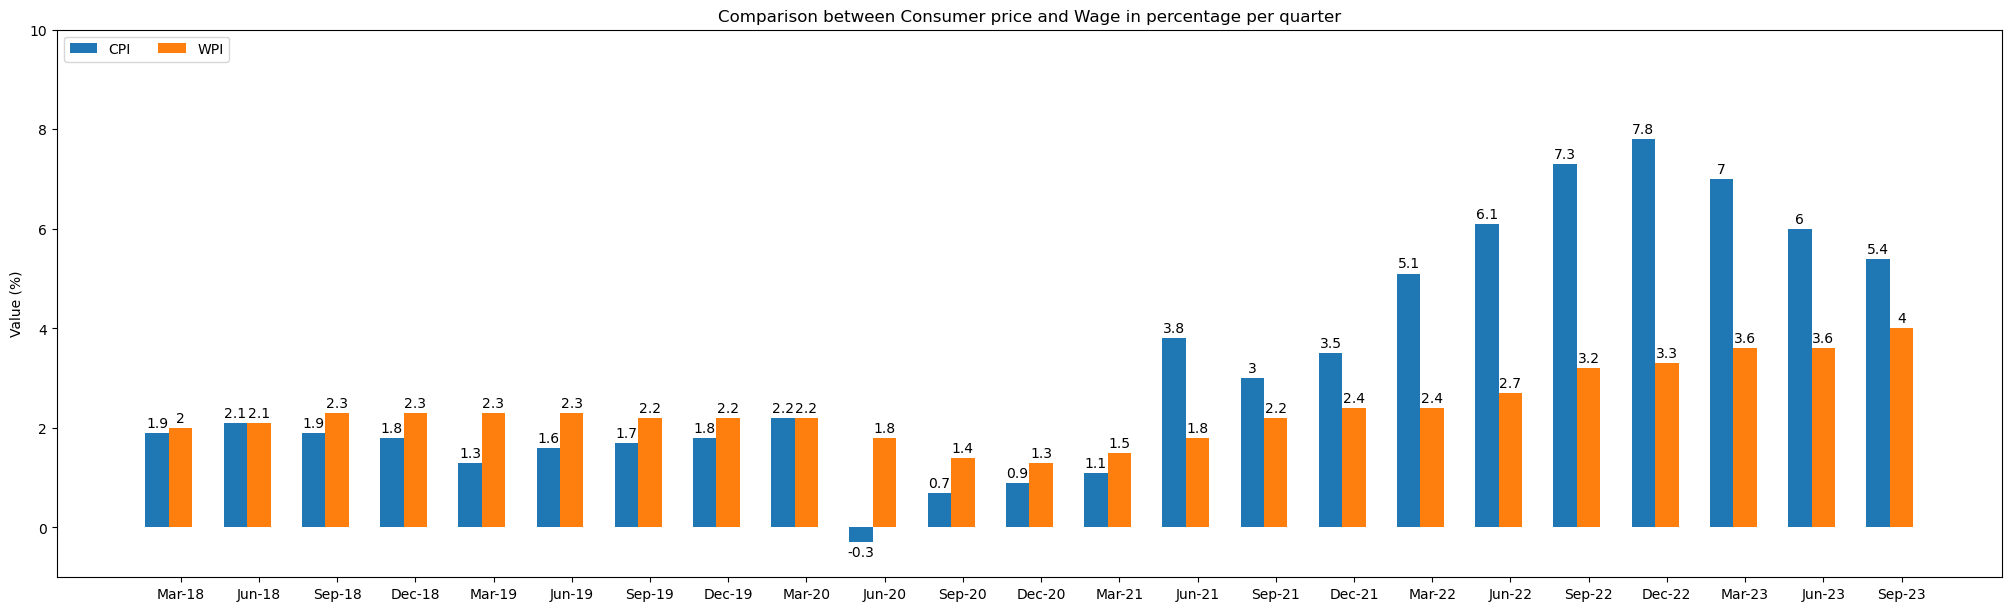

In [370]:
# Create figure and axis objects
fig, ax = plt.subplots(layout='constrained')

# Plot the data
for attribute, measurement in value.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1
    
# Add some text for labels, title, legend and custom x-axis tick labels.
ax.set_ylabel('Value (%)')
ax.set_title('Comparison between Consumer price and Wage in percentage per quarter')
ax.set_xticks(x + width, date)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-1, 10)
fig.set_size_inches(20, 6)

plt.show()
plt.close()

In [371]:
#Housing Data Cleanup

In [372]:
# Housing Path for Files (Lachlan)
March_2020csv = Path("./Resources/Housing/March quarter 2020.csv")
March_2021csv = Path("./Resources/Housing/March quarter 2021.csv")
March_2022csv = Path("./Resources/Housing/March quarter 2022.csv")
June_2019csv = Path("./Resources/Housing/June quarter 2019.csv")
June_2020csv = Path("./Resources/Housing/June quarter 2020.csv")
June_2021csv = Path("./Resources/Housing/June quarter 2021.csv")
Sept_2019csv = Path("./Resources/Housing/September quarter 2019.csv")
Sept_2020csv = Path("./Resources/Housing/September quarter 2020.csv")
Sept_2021csv = Path("./Resources/Housing/September quarter 2021.csv")  
Dec_2019csv = Path("./Resources/Housing/December quarter 2019.csv")
Dec_2020csv = Path("./Resources/Housing/December quarter 2020.csv")
Dec_2021csv = Path("./Resources/Housing/December quarter 2021.csv")
Combined_2022csv = Path("./Resources/Housing/2022.csv")
Combined_2023csv = Path("./Resources/Housing/2023.csv")

In [373]:
# pd Reading (Lachlan)
March_2020 = pd.read_csv(March_2020csv)
March_2021 = pd.read_csv(March_2021csv)
March_2022 = pd.read_csv(March_2022csv)
June_2019 = pd.read_csv(June_2019csv)
June_2020 = pd.read_csv(June_2020csv)
June_2021 = pd.read_csv(June_2021csv)
Sept_2019 = pd.read_csv(Sept_2019csv)
Sept_2020 = pd.read_csv(Sept_2020csv)
Sept_2021 = pd.read_csv(Sept_2021csv)
Dec_2019 = pd.read_csv(Dec_2019csv)
Dec_2020 = pd.read_csv(Dec_2020csv)
Dec_2021 = pd.read_csv(Dec_2021csv)
Combined_2022 = pd.read_csv(Combined_2022csv)
Combined_2023 = pd.read_csv(Combined_2023csv)

In [374]:
March_2020

,"Mean dwelling price, states and territories, March quarter 2020"
NaN,Mean price ($'000)
NSW,890.4
VIC,754.6
QLD,518.7
SA,470.1
WA,501.9
TAS,450.4
NT,413.2
ACT,701
Australia,690.2


In [375]:
#removing Header row (Lachlan)
March_2020 = March_2020[1:]
March_2020

,"Mean dwelling price, states and territories, March quarter 2020"
NSW,890.4
VIC,754.6
QLD,518.7
SA,470.1
WA,501.9
TAS,450.4
NT,413.2
ACT,701
Australia,690.2
"Source: Australian Bureau of Statistics, Residential Property Price Indexes: Eight Capital Cities March 2020",NaN


In [376]:
#removing all irrelevant rows (Lachlan)
March_2020 = March_2020.iloc[8:9]
March_2020

,"Mean dwelling price, states and territories, March quarter 2020"
Australia,690.2


In [377]:
#renaming Column header (Lachlan)
March_2020.columns = ['2020 Qtr 1']
March_2020

,2020 Qtr 1
Australia,690.2


In [378]:
#Transposing as Date is a row required within final data (Lachlan)
#Making Transpose as a new final Dataframe (Lachlan)
CleanMarch_2020=March_2020.transpose()
CleanMarch_2020

,Australia
2020 Qtr 1,690.2


In [379]:
#Repeating previous steps for different CSV (Lachlan)
March_2021 = March_2021[1:] 
March_2021 = March_2021.iloc[8:9]
March_2021.columns = ['2021 Qtr 1']
CleanMarch_2021=March_2021.transpose()
CleanMarch_2021

,Australia
2021 Qtr 1,779


In [380]:
#repeating previous steps for different CSV (Lachlan)
March_2022 = March_2022[1:]
March_2022 = March_2022.iloc[8:9]
March_2022.columns = ['2022 Qtr 1']
CleanMarch_2022=March_2022.transpose()
CleanMarch_2022

,Australia
2022 Qtr 1,941.9


In [381]:
#repeating previous steps for different CSV (Lachlan)
June_2019 = June_2019[1:]
June_2019 = June_2019.iloc[8:9]
June_2019.columns = ['2019 Qtr 2']
CleanJune_2019=June_2019.transpose()
CleanJune_2019

,Australia
2019 Qtr 2,638.9


In [382]:
#repeating previous steps for different CSV (Lachlan)
June_2020 = June_2020[1:]
June_2020 = June_2020.iloc[8:9]
June_2020.columns = ['2020 Qtr 2']
CleanJune_2020=June_2020.transpose()
CleanJune_2020

,Australia
2020 Qtr 2,678.5


In [383]:
#repeating previous steps for different CSV (Lachlan)
June_2021 = June_2021[1:]
June_2021 = June_2021.iloc[8:9]
June_2021.columns = ['2021 Qtr 2']
CleanJune_2021=June_2021.transpose()
CleanJune_2021

,Australia
2021 Qtr 2,835.7


In [384]:
#repeating previous steps for different CSV (Lachlan)
Sept_2019 = Sept_2019[1:]
Sept_2019 = Sept_2019.iloc[8:9]
Sept_2019.columns = ['2019 Qtr 3']
CleanSept_2019=Sept_2019.transpose()
CleanSept_2019

,Australia
2019 Qtr 3,660.8


In [385]:
#repeating previous steps for different CSV (Lachlan)
Sept_2020 = Sept_2020[1:]
Sept_2020 = Sept_2020.iloc[8:9]
Sept_2020.columns = ['2020 Qtr 3']
CleanSept_2020=Sept_2020.transpose()
CleanSept_2020

,Australia
2020 Qtr 3,689.5


In [386]:
#repeating previous steps for different CSV (Lachlan)
Sept_2021 = Sept_2021[1:]
Sept_2021 = Sept_2021.iloc[8:9]
Sept_2021.columns = ['2021 Qtr 3']
CleanSept_2021=Sept_2021.transpose()
CleanSept_2021

,Australia
2021 Qtr 3,863.7


In [387]:
#repeating previous steps for different CSV (Lachlan)
Dec_2019 = Dec_2019[1:] 
Dec_2019 = Dec_2019.iloc[8:9]
Dec_2019.columns = ['2019 Qtr 4']
CleanDec_2019=Dec_2019.transpose()
CleanDec_2019

,Australia
2019 Qtr 4,691


In [388]:
#repeating previous steps for different CSV (Lachlan)
Dec_2020 = Dec_2020[1:]
Dec_2020 = Dec_2020.iloc[8:9]
Dec_2020.columns = ['2020 Qtr 4']
CleanDec_2020=Dec_2020.transpose()
CleanDec_2020

,Australia
2020 Qtr 4,728.5


In [389]:
#repeating previous steps for different CSV (Lachlan)
Dec_2021 = Dec_2021[1:]
Dec_2021 = Dec_2021.iloc[8:9]
Dec_2021.columns = ['2021 Qtr 4']
CleanDec_2021=Dec_2021.transpose()
CleanDec_2021

,Australia
2021 Qtr 4,920.1


In [390]:
Combined_2022

,,,"Mean dwelling price, states and territories"
NaN,Jun Qtr 22,Sep Qtr 22,Dec Qtr 22
NSW,"1,270.4","1,176.3","1,130.5"
VIC,973.5,921.6,894.4
QLD,795.4,767.7,738.8
SA,653.1,650.6,644.3
WA,643,629.3,630.3
TAS,685.9,673.6,649.6
NT,501.1,490,488.2
ACT,"1,023.7",961.7,929.2
Australia,961.1,909.9,881.2


In [391]:
#Repeating similar Steps to previous but with Variasion due to different csv structire (Lachlan)
Combined_2022 = Combined_2022.reset_index()
Combined_2022 = Combined_2022[1:]
Combined_2022 = Combined_2022.iloc[8:9]
Combined_2022.columns = ['','2022 Qtr 2','2022 Qtr 3','2022 Qtr 4']
Combined_2022 = Combined_2022.iloc[0]
CleanCombined_2022=Combined_2022.transpose()

In [392]:
CleanCombined_2022


              Australia
2022 Qtr 2        961.1
2022 Qtr 3        909.9
2022 Qtr 4        881.2
Name: 9, dtype: object

In [393]:
#As data was an object, creating as DataFrame (Lachlan)
data = {
    '': ['2022 Qtr 2', '2022 Qtr 3', '2022 Qtr 4'],
    'Australia': [961.1, 909.9, 881.2]
}

CleanCombined_2022 = pd.DataFrame(data)
CleanCombined_2022

,,Australia
0,2022 Qtr 2,961.1
1,2022 Qtr 3,909.9
2,2022 Qtr 4,881.2


In [394]:
Combined_2023

,,,"Mean dwelling price, states and territories"
NaN,Mar Qtr 23 ($'000),Jun Qtr 23 ($'000),Sep Qtr 23 ($'000)
NSW,"1,129.6","1,162.9","1,187.2"
VIC,898.4,894.8,903.6
QLD,757.1,773.4,797.9
SA,663.3,694,722.1
WA,653.6,659.3,681.4
TAS,670.3,657.8,655.7
NT,517.4,519.4,525.9
ACT,940.8,940.2,943.8
Australia,890.9,906.2,925.4


In [395]:
#Repeating for Combined 2023 (Lachlan)
Combined_2023 = Combined_2023.reset_index()
Combined_2023 = Combined_2023[1:]
Combined_2023 = Combined_2023.iloc[8:9]
Combined_2023.columns = ['','2023 Qtr 1','2023 Qtr 2','2023 Qtr 3']
Combined_2023 = Combined_2023.iloc[0]
CleanCombined_2023=Combined_2023.transpose()
CleanCombined_2023

              Australia
2023 Qtr 1        890.9
2023 Qtr 2        906.2
2023 Qtr 3        925.4
Name: 9, dtype: object

In [396]:
data = {
    '': ['2023 Qtr 1', '2023 Qtr 2', '2022 Qtr 3'],
    'Australia': [890.9, 906.2, 925.4]
}

CleanCombined_2023 = pd.DataFrame(data)
CleanCombined_2023

,,Australia
0,2023 Qtr 1,890.9
1,2023 Qtr 2,906.2
2,2022 Qtr 3,925.4


In [397]:
#Merging of all Single Qtr data (Lachlan)
housing_clean = pd.concat([CleanDec_2019, CleanDec_2020, CleanDec_2021, CleanJune_2019,
                            CleanJune_2020, CleanJune_2021, CleanSept_2019, CleanSept_2020, 
                            CleanSept_2021, CleanMarch_2020, CleanMarch_2021, CleanMarch_2022,], sort=False)
housing_clean

,Australia
2019 Qtr 4,691
2020 Qtr 4,728.5
2021 Qtr 4,920.1
2019 Qtr 2,638.9
2020 Qtr 2,678.5
2021 Qtr 2,835.7
2019 Qtr 3,660.8
2020 Qtr 3,689.5
2021 Qtr 3,863.7
2020 Qtr 1,690.2


In [398]:
#Adding an Index so I Could merge with the Combined 22, 23 files (Lachlan)
housing_clean = housing_clean.reset_index(drop=False)

In [399]:
#Combinding and adding in column headers (Lachlan)
Combined = pd.concat([CleanCombined_2022,CleanCombined_2023], sort =False)
Combined.columns=['index','Australia']
Combined

,index,Australia
0,2022 Qtr 2,961.1
1,2022 Qtr 3,909.9
2,2022 Qtr 4,881.2
0,2023 Qtr 1,890.9
1,2023 Qtr 2,906.2
2,2022 Qtr 3,925.4


In [400]:
#Combining all the combined and the Single Qtr data (Lachlan)
housing_clean = pd.concat([housing_clean, Combined], sort=False)

In [401]:
#sorting by Value (Lachlan)
housing_clean = housing_clean.sort_values('index')
#removing column name for neatness (Lachlan)
housing_clean.columns=['','Australia']
housing_clean

,,Australia
3,2019 Qtr 2,638.9
6,2019 Qtr 3,660.8
0,2019 Qtr 4,691
9,2020 Qtr 1,690.2
4,2020 Qtr 2,678.5
7,2020 Qtr 3,689.5
1,2020 Qtr 4,728.5
10,2021 Qtr 1,779
5,2021 Qtr 2,835.7
8,2021 Qtr 3,863.7


In [402]:
#exporting file (Lachlan)
housing_clean.to_csv('housing_clean.csv', index = False)

In [403]:
#Income file Cleanup

In [404]:
# specifying the path to csv files (Lachlan)
income_1csv = Path("./Resources/Income/Australian Bureau of Statistics.csv")
income_2csv = Path("./Resources/Income/Australian Bureau of Statistics (1).csv")
income_3csv = Path("./Resources/Income/Australian Bureau of Statistics (2).csv")
income_4csv = Path("./Resources/Income/Australian Bureau of Statistics (3).csv")

# pd Reading (Lachlan)
income_1 = pd.read_csv(income_1csv)
income_2 = pd.read_csv(income_2csv)
income_3 = pd.read_csv(income_3csv)
income_4 = pd.read_csv(income_4csv)

income_1

,Unnamed: 0,August 2021,August 2020,August 2015,2020 to 2021(% change),2015 to 2021(% change p.a.)
0,Men,$1380,$1300,$1187,6.2%,2.7%
1,Women,$1018,$1000,$850,1.8%,3.3%
2,Total,$1200,$1150,$1000,4.3%,3.3%
3,NaN,NaN,NaN,NaN,NaN,NaN
4,"Source: Australian Bureau of Statistics, Emplo...",NaN,NaN,NaN,NaN,NaN


In [405]:
#income_1.head() (Lachlan)
new_header = income_2.iloc[0] #grab the first row for the header (Lachlan)
income_2 = income_2[1:] #take the data less the header row (Lachlan)
income_2.columns = new_header #set the header row as the df header (Lachlan)
income_2.columns = income_2.columns.fillna('Unnamed: 0')

In [406]:
income_1.loc[2:2]

,Unnamed: 0,August 2021,August 2020,August 2015,2020 to 2021(% change),2015 to 2021(% change p.a.)
2,Total,$1200,$1150,$1000,4.3%,3.3%


In [407]:
# Grabbing only what is required (Lachlan)
income_2_sub_df = income_2.loc[4:4][['Unnamed: 0','August 2023','August 2018']]
income_2_sub_df.columns = ['Unnamed: 0', '2023','2018']
income_2_sub_df

,Unnamed: 0,2023,2018
4,Total,"$1,300","$1,075"


In [408]:
#grabbing only what is required (Lachlan)
income_3_sub_df = income_3.loc[2:2][['Unnamed: 0', 'August 2022', 'August 2021']]
income_3_sub_df

,Unnamed: 0,August 2022,August 2021
2,Total,"$1,250","$1,200"


In [409]:
#grabbing only what is required (Lachlan)
income_4_sub_df = income_4.loc[2:2][['Unnamed: 0', 'August 2020', 'August 2019']]
income_4_sub_df

,Unnamed: 0,August 2020,August 2019
2,Total,$1150,$1100


In [410]:
#concat merging data (Lachlan)
concat_3_4_df = pd.concat([income_3_sub_df, income_4_sub_df], axis = 1)
concat_3_4_df.columns = ['Unnamed: 0', '2022','2021','to_be_removed','2020','2019']

concat_3_4_df = concat_3_4_df.drop(concat_3_4_df.columns[3], axis=1)
concat_3_4_df

,Unnamed: 0,2022,2021,2020,2019
2,Total,"$1,250","$1,200",$1150,$1100


In [411]:
#Merging of all files (Lachlan)
merged_df = pd.merge(income_2_sub_df, concat_3_4_df, on = 'Unnamed: 0')
merged_df = merged_df.transpose()
new_header = merged_df.iloc[0] #grab the first row for the header (Lachlan)
merged_df = merged_df[1:] #take the data less the header row (Lachlan)
merged_df.columns = new_header #set the header row as the df header (Lachlan)
merged_df.reset_index(inplace = True)
merged_df.columns = ["Year", "Income Per Week"]
merged_df

,Year,Income Per Week
0,2023,"$1,300"
1,2018,"$1,075"
2,2022,"$1,250"
3,2021,"$1,200"
4,2020,$1150
5,2019,$1100


In [412]:
#clean of data and sorting by values (Lachlan)
merged_df['Income Per Week'] = merged_df['Income Per Week'].str.replace("$","",regex=False)
merged_df['Income Per Week'] = merged_df['Income Per Week'].str.replace(",","",regex=False)
merged_df['Income Per Week'] = merged_df['Income Per Week'].astype(int)
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df = merged_df.sort_values('Year')
merged_df

,Year,Income Per Week
1,2018,1075
5,2019,1100
4,2020,1150
3,2021,1200
2,2022,1250
0,2023,1300


In [413]:
#creating new column of per week change in percentage (Lachlan)
merged_df['Income Per Annum'] = merged_df['Income Per Week'] * 52
merged_df

,Year,Income Per Week,Income Per Annum
1,2018,1075,55900
5,2019,1100,57200
4,2020,1150,59800
3,2021,1200,62400
2,2022,1250,65000
0,2023,1300,67600


In [414]:
#adding required shift column for percentage (Lachlan)
merged_df['Income_Shift'] = merged_df['Income Per Annum'].shift(1)
merged_df

,Year,Income Per Week,Income Per Annum,Income_Shift
1,2018,1075,55900,NaN
5,2019,1100,57200,55900.0
4,2020,1150,59800,57200.0
3,2021,1200,62400,59800.0
2,2022,1250,65000,62400.0
0,2023,1300,67600,65000.0


In [415]:
#percentage per Annum forumla (Lachlan)
merged_df['% Change per Year'] = round((merged_df['Income Per Annum'] /merged_df['Income_Shift']) * 100 - 100,2)
merged_df

,Year,Income Per Week,Income Per Annum,Income_Shift,% Change per Year
1,2018,1075,55900,NaN,NaN
5,2019,1100,57200,55900.0,2.33
4,2020,1150,59800,57200.0,4.55
3,2021,1200,62400,59800.0,4.35
2,2022,1250,65000,62400.0,4.17
0,2023,1300,67600,65000.0,4.00


In [416]:
#Removing Shift as no longer required (Lachlan)
merged_df = merged_df.drop(columns=['Income_Shift'])
merged_df

,Year,Income Per Week,Income Per Annum,% Change per Year
1,2018,1075,55900,NaN
5,2019,1100,57200,2.33
4,2020,1150,59800,4.55
3,2021,1200,62400,4.35
2,2022,1250,65000,4.17
0,2023,1300,67600,4.00


In [417]:
merged_df.dtypes

Year                   int32
Income Per Week        int32
Income Per Annum       int32
% Change per Year    float64
dtype: object

In [418]:
#exporting (Lachlan)
merged_df.to_csv('income_clean.csv', index = False)

In [419]:
#Merging of multiple csv's for Plotting and Comparison

In [420]:
# Csv Paths (Lachlan)
housing_cleancsv = Path("./Resources/Housing/housing_clean.csv")
housing_per_yearcsv = Path("./Resources/Housing/housing_per_year.csv")
inflationcsv= Path ("./Resources/Inflation/Inflation Tradable & Non-tradable, annual movement.csv")
income_cleancsv = Path("./Resources/Income/income_clean.csv")

In [421]:
# Panda Reading (Lachlan)
housing_clean = pd.read_csv(housing_cleancsv)
housing_per_year = pd.read_csv(housing_per_yearcsv)
inflation = pd.read_csv(inflationcsv)
income_clean = pd.read_csv(income_cleancsv)

In [422]:
#Introducing a new column 'Shift' to create a annual change percentage (Lachlan)
housing_clean
housing_clean['Dwelling_Shift'] = housing_clean['Average Australian Dwelling ($000)'].shift(1)
#Using shift to create a new Column regarding Percentage change per Qty (Lachlan)
housing_clean['% Change in Dwelling per Qtr'] = round ((housing_clean['Average Australian Dwelling ($000)'] /housing_clean['Dwelling_Shift']) *100 -100,2)
#Removing Shift column as no longer required (Lachlan)
housing_clean = housing_clean.drop(columns=['Dwelling_Shift'])
housing_clean

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr
0,2019 Qtr 2,638.9,NaN
1,2019 Qtr 3,660.8,3.43
2,2019 Qtr 4,691.0,4.57
3,2020 Qtr 1,690.2,-0.12
4,2020 Qtr 2,678.5,-1.70
5,2020 Qtr 3,689.5,1.62
6,2020 Qtr 4,728.5,5.66
7,2021 Qtr 1,779.0,6.93
8,2021 Qtr 2,835.7,7.28
9,2021 Qtr 3,863.7,3.35


In [423]:
#Introducing a new column 'Shift' to create a annual change percentage (Lachlan)
housing_per_year
#Using shift to create a new Column regarding Percentage change per Qty (Lachlan)
housing_per_year['Dwelling_Shift'] = housing_per_year['Average Australian Dwelling ($000)'].shift(1)
housing_per_year['% Change in Dwelling per Qtr'] = round ((housing_per_year['Average Australian Dwelling ($000)'] /housing_per_year['Dwelling_Shift']) *100 -100,2)
#Removing Shift column as no longer required (Lachlan)
housing_per_year = housing_per_year.drop(columns=['Dwelling_Shift'])
housing_per_year

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr
0,2018,NaN,NaN
1,2019,638.9,NaN
2,2020,678.5,6.20
3,2021,835.7,23.17
4,2022,961.1,15.01
5,2023,906.2,-5.71


In [424]:
inflation

,Date,Tradables,Non-tradables,Median
0,2018,0.6,2.4,1.50
1,2019,1.7,2.0,1.85
2,2020,-0.6,1.5,0.45
3,2021,4.9,2.8,3.85
4,2022,8.7,7.4,8.05
5,2023,1.5,5.4,3.45


In [425]:
income_clean

,Year,Income Per Week,Income Per Annum,% Change per Year
0,2018,1075,55900,NaN
1,2019,1100,57200,2.33
2,2020,1150,59800,4.55
3,2021,1200,62400,4.35
4,2022,1250,65000,4.17
5,2023,1300,67600,4.00


In [426]:
#Merging of 2 csv's for new Dataframe (Lachlan)
housing_income_df = pd.concat([housing_clean, income_clean], axis =0)

In [427]:
#making column string to sort Values (Lachlan)
housing_income_df["Year"] = housing_income_df["Year"].astype(str)

In [428]:
#Sorting Values (Lachlan)
housing_income_df = housing_income_df.sort_values('Year')

In [429]:
housing_income_df

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr,Income Per Week,Income Per Annum,% Change per Year
0,2018,NaN,NaN,1075.0,55900.0,NaN
1,2019,NaN,NaN,1100.0,57200.0,2.33
0,2019 Qtr 2,638.9,NaN,NaN,NaN,NaN
1,2019 Qtr 3,660.8,3.43,NaN,NaN,NaN
2,2019 Qtr 4,691.0,4.57,NaN,NaN,NaN
2,2020,NaN,NaN,1150.0,59800.0,4.55
3,2020 Qtr 1,690.2,-0.12,NaN,NaN,NaN
4,2020 Qtr 2,678.5,-1.70,NaN,NaN,NaN
5,2020 Qtr 3,689.5,1.62,NaN,NaN,NaN
6,2020 Qtr 4,728.5,5.66,NaN,NaN,NaN


In [430]:
#Creating new Column to adjust the value of Income per Annum so its comparable (Lachlan)
housing_income_df['Income Per Annum($00)'] = housing_income_df['Income Per Annum'] / 100
housing_income_df.replace
housing_income_df

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr,Income Per Week,Income Per Annum,% Change per Year,Income Per Annum($00)
0,2018,NaN,NaN,1075.0,55900.0,NaN,559.0
1,2019,NaN,NaN,1100.0,57200.0,2.33,572.0
0,2019 Qtr 2,638.9,NaN,NaN,NaN,NaN,NaN
1,2019 Qtr 3,660.8,3.43,NaN,NaN,NaN,NaN
2,2019 Qtr 4,691.0,4.57,NaN,NaN,NaN,NaN
2,2020,NaN,NaN,1150.0,59800.0,4.55,598.0
3,2020 Qtr 1,690.2,-0.12,NaN,NaN,NaN,NaN
4,2020 Qtr 2,678.5,-1.70,NaN,NaN,NaN,NaN
5,2020 Qtr 3,689.5,1.62,NaN,NaN,NaN,NaN
6,2020 Qtr 4,728.5,5.66,NaN,NaN,NaN,NaN


In [431]:
#creating Variables for plotting (Lachlan)
year = housing_income_df["Year"]
income = housing_income_df["Income Per Annum($00)"]
dwelling = housing_income_df["Average Australian Dwelling ($000)"]
income_per = housing_income_df["% Change per Year"]

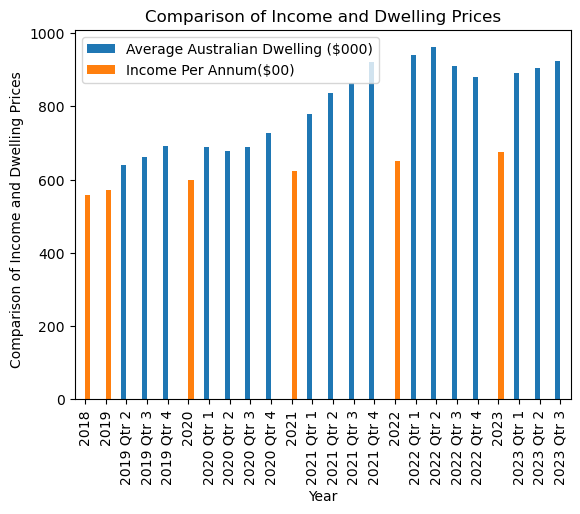

In [434]:
ax5 = housing_income_df.plot(x='Year', y=['Average Australian Dwelling ($000)', 'Income Per Annum($00)'], kind='bar')
# Setting the x-axis ticks and labels (Lachlan)

ax5.set_xticks(range(len(housing_income_df['Year'])))
ax5.set_xticklabels(housing_income_df['Year'].astype(str))
# Adding labels and title (Lachlan)
plt.xlabel('Year')
plt.ylabel('Comparison of Income and Dwelling Prices  ')
plt.title('Comparison of Income and Dwelling Prices')
# Showing the plot (Lachlan)
plt.show()


In [436]:
#saving the plot (Lachlan)
plt.savefig('Comparison of Income and Dwelling Prices.jpg')



<Figure size 640x480 with 0 Axes>

In [437]:
plt.close()

In [438]:
#removing a duplicate column not required within merge (Lachlan)
housing_per_year = housing_per_year.drop(columns=['Year'])

In [439]:
#removing a duplicate column not required within merge (Lachlan)
inflation = inflation.drop(columns=['Date'])

In [440]:
#Merging of data to compare percentages (Lachlan)
Income_combined = pd.concat([income_clean, housing_per_year,inflation ], axis =1)
Income_combined

,Year,Income Per Week,Income Per Annum,% Change per Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr,Tradables,Non-tradables,Median
0,2018,1075,55900,NaN,NaN,NaN,0.6,2.4,1.50
1,2019,1100,57200,2.33,638.9,NaN,1.7,2.0,1.85
2,2020,1150,59800,4.55,678.5,6.20,-0.6,1.5,0.45
3,2021,1200,62400,4.35,835.7,23.17,4.9,2.8,3.85
4,2022,1250,65000,4.17,961.1,15.01,8.7,7.4,8.05
5,2023,1300,67600,4.00,906.2,-5.71,1.5,5.4,3.45


In [441]:
#changing column names to be more precise (Lachlan)
Income_combined.rename(columns={'% Change per Year':'% Change in income per Year','% Change in Dwelling per Qtr':'% Change in Dwelling per Year'}, inplace = True)
Income_combined

,Year,Income Per Week,Income Per Annum,% Change in income per Year,Average Australian Dwelling ($000),% Change in Dwelling per Year,Tradables,Non-tradables,Median
0,2018,1075,55900,NaN,NaN,NaN,0.6,2.4,1.50
1,2019,1100,57200,2.33,638.9,NaN,1.7,2.0,1.85
2,2020,1150,59800,4.55,678.5,6.20,-0.6,1.5,0.45
3,2021,1200,62400,4.35,835.7,23.17,4.9,2.8,3.85
4,2022,1250,65000,4.17,961.1,15.01,8.7,7.4,8.05
5,2023,1300,67600,4.00,906.2,-5.71,1.5,5.4,3.45


In [442]:
Income_combined

,Year,Income Per Week,Income Per Annum,% Change in income per Year,Average Australian Dwelling ($000),% Change in Dwelling per Year,Tradables,Non-tradables,Median
0,2018,1075,55900,NaN,NaN,NaN,0.6,2.4,1.50
1,2019,1100,57200,2.33,638.9,NaN,1.7,2.0,1.85
2,2020,1150,59800,4.55,678.5,6.20,-0.6,1.5,0.45
3,2021,1200,62400,4.35,835.7,23.17,4.9,2.8,3.85
4,2022,1250,65000,4.17,961.1,15.01,8.7,7.4,8.05
5,2023,1300,67600,4.00,906.2,-5.71,1.5,5.4,3.45


In [443]:
#Creating additional variables for plotting (Lachlan)
dwelling_per_year = Income_combined['Average Australian Dwelling ($000)']
Inflation = Income_combined["Median"]

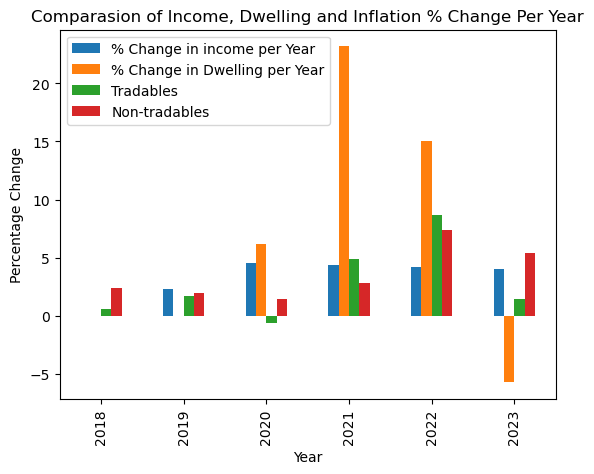

<Figure size 640x480 with 0 Axes>

In [444]:
# Plotting the bar graph (Lachlan)
ax = Income_combined.plot(x='Year', y=['% Change in income per Year','% Change in Dwelling per Year','Tradables','Non-tradables'], kind='bar')
# Setting the x-axis ticks and labels (Lachlan)
ax.set_xticks(range(len(Income_combined['Year'])))
ax.set_xticklabels((Income_combined['Year'].astype(int)))
# Adding labels and title (Lachlan)
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Comparasion of Income, Dwelling and Inflation % Change Per Year')
# Showing the plot (Lachlan)
plt.show()
#saving the plot (Lachlan)
plt.savefig('Comparasion of Income, Dwelling and Inflation % Change Per Year.jpg')

In [445]:
plt.close()

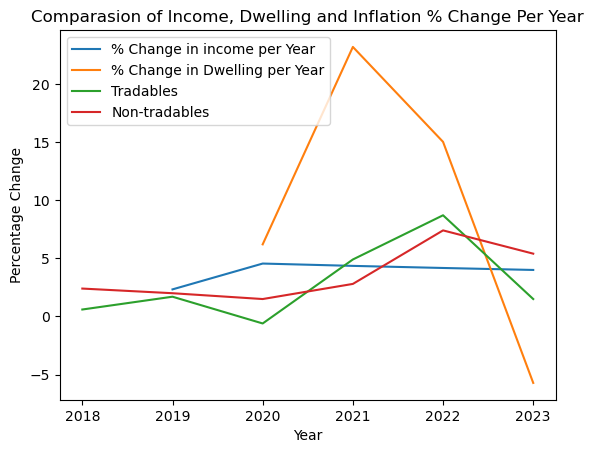

<Figure size 640x480 with 0 Axes>

In [446]:
# Plotting the line graph (Lachlan)
ax = Income_combined.plot(x='Year', y=['% Change in income per Year','% Change in Dwelling per Year','Tradables','Non-tradables'], kind='line')
# Setting the x-axis ticks and labels (Lachlan)
ax.set_xticks(Income_combined['Year'])
ax.set_xticklabels((Income_combined['Year'].astype(int)))
# Adding labels and title (Lachlan)
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Comparasion of Income, Dwelling and Inflation % Change Per Year')
# Showing the plot (Lachlan)
plt.show()
plt.savefig('Comparasion of Income, Dwelling and Inflation % Change Per Year, Line Graph.jpg', format='jpg')

In [447]:
plt.close()